In [1]:
#step 1 Load the file data/gapminder_total_fertility.csv into pandas.
import pandas as pd
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
print(fert.head())

                       1800  1801  1802  1803  1804  1805  1806  1807  1808  \
Total fertility rate                                                          
Abkhazia                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria                6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   

                       1809  ...  2006  2007  2008  2009  2010  2011  2012  \
Total fertility rate         ...                                             
Abkhazia                NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  ...  6.70  6.46  6.20  5.93  5.66  5.40  5.14   
Akrotiri and Dhekelia   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  ...  1.85  1.80  1.76  1.74

In [2]:
#step 2 Proceed in the same way with the file data/gapminder_lifeexpectancy.xlsx. Save it in a DataFrame with the name life. Use the function pandas.read_excel() to read in the excel file.


life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
life.shape

(260, 217)

In [3]:
#step 3 Check the shape of both tables
print(fert.shape)
print(life.shape)

(260, 216)
(260, 217)


In [4]:
#step 4 Take a look at the columns of both tables. 
print(fert.columns)
life.columns



Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)


Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [5]:
# One table has columns as strings, the other has integer numbers. To merge the tables, we need to convert both into the same format.
life.columns = life.columns.astype(int)
fert.columns = fert.columns.astype(int)

In [6]:
# Check with fert.columns whether the transformation was successful.
print(life.columns)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)


Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [7]:
#step 5 Now, let’s check the row index of the table
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [8]:
# The name of the index should be called country. You can change it with
fert.index.name = 'country'


In [9]:
#step 6 Now convert the table into long format. First, we have to move the row index into a column
fert = fert.reset_index()
# Second, we use the convenient melt function for the conversion
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
print(fert.head())

                 country  year  fertility_rate
0               Abkhazia  1800             NaN
1            Afghanistan  1800            7.00
2  Akrotiri and Dhekelia  1800             NaN
3                Albania  1800            4.60
4                Algeria  1800            6.99


In [10]:
#step 7 Repeat steps 5-6 for the life expectancy data, so that it’s also in long format.
life.index
life.index.name = 'country'
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
print(life.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [11]:
#step 8 To make things even more interesting, let’s also introduce population data from the file data/gapminder_population.xlsx.
#Read the data in with pandas, and get that DataFrame into the same format as the other two.

population = pd.read_excel('gapminder_population.xlsx', index_col=0)
population.head()

1800.0     1810.0     1820.0     1830.0     1840.0  \
Total population                                                               
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan            3280000.0  3280000.0  3323519.0  3448982.0  3625022.0   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                 410445.0   423591.0   438671.0   457234.0   478227.0   
Algeria                2503218.0  2595056.0  2713079.0  2880355.0  3082721.0   

                          1850.0     1860.0     1870.0     1880.0     1890.0  \
Total population                                                               
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan            3810047.0  3973968.0  4169690.0  4419695.0  4710171.0   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                 506889.0   552800.0   610036.0   672544.0   741688.0   
Algeria                3299305.0  3536468.0  3811028.0  4143163.0  4525691.0   

                       ...      2006.0      2007.0      2008.0      2009.0  \
Total population       ...                                                   
Abkhazia               ...         NaN         NaN         NaN         NaN   
Afghanistan            ...  25183615.0  25877544.0  26528741.0  27207291.0   
Akrotiri and Dhekelia  ...     15700.0     15700.0     15700.0         NaN   
Albania                ...   3050741.0   3010849.0   2968026.0   2929886.0   
Algeria                ...  33749328.0  34261971.0  34811059.0  35401790.0   

                           2010.0      2011.0      2012.0      2013.0  \
Total population                                                        
Abkhazia                      NaN         NaN         NaN         NaN   
Afghanistan            27962207.0  28809167.0  29726803.0  30682500.0   
Akrotiri and Dhekelia         NaN         NaN         NaN         NaN   
Albania                 2901883.0   2886010.0   2880667.0   2883281.0   
Algeria                36036159.0  36717132.0  37439427.0  38186135.0   

                           2014.0      2015.0  
Total population                               
Abkhazia                      NaN         NaN  
Afghanistan            31627506.0  32526562.0  
Akrotiri and Dhekelia         NaN         NaN  
Albania                 2889676.0   2896679.0  
Algeria                38934334.0  39666519.0  

[5 rows x 81 columns]

In [12]:
population.columns
population.columns = population.columns.astype(int)

In [13]:
population.index.name = 'country'
population = population.reset_index()
population = population.melt(id_vars='country', var_name='year', value_name='population')
print(population.head())

                 country  year  population
0               Abkhazia  1800         NaN
1            Afghanistan  1800   3280000.0
2  Akrotiri and Dhekelia  1800         NaN
3                Albania  1800    410445.0
4                Algeria  1800   2503218.0


In [14]:
# step 9 Now we can start gluing the DataFrames together. This works great with the merge function
df = fert.merge(population)
#print(df.head())
df = df.merge(life)
#print(df.head())
#df = df.head(10)
continent = pd.read_csv('continents.csv', sep=';', index_col = 0)
continent = continent.reset_index()
df = df.merge(continent)
df.population = round(df.population/1000000, 1)
continent.head(10)
df.head(10)

country  year  fertility_rate  population  life_expectancy continent
0  Afghanistan  1800             7.0         3.3            28.21      Asia
1  Afghanistan  1810             7.0         3.3            28.11      Asia
2  Afghanistan  1820             7.0         3.3            28.01      Asia
3  Afghanistan  1830             7.0         3.4            27.90      Asia
4  Afghanistan  1840             7.0         3.6            27.80      Asia
5  Afghanistan  1850             7.0         3.8            27.70      Asia
6  Afghanistan  1860             7.0         4.0            27.60      Asia
7  Afghanistan  1870             7.0         4.2            27.49      Asia
8  Afghanistan  1880             7.0         4.4            27.39      Asia
9  Afghanistan  1890             7.0         4.7            27.29      Asia

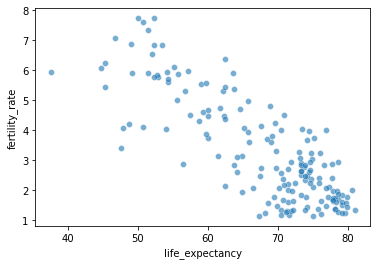

In [15]:
# step 10 With all the data merged into a single object, you can now select specific columns and plot them

import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.6)
plt.show()

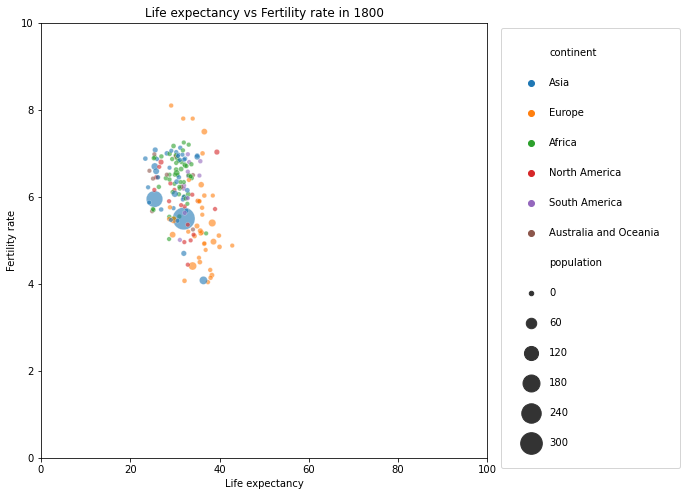

<Figure size 432x288 with 0 Axes>

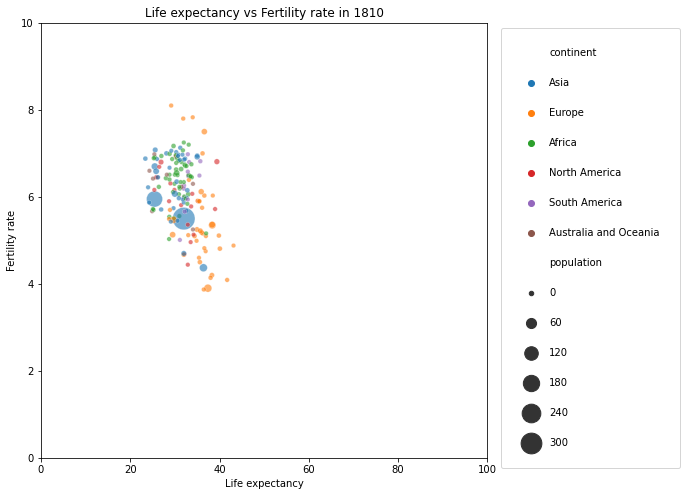

<Figure size 432x288 with 0 Axes>

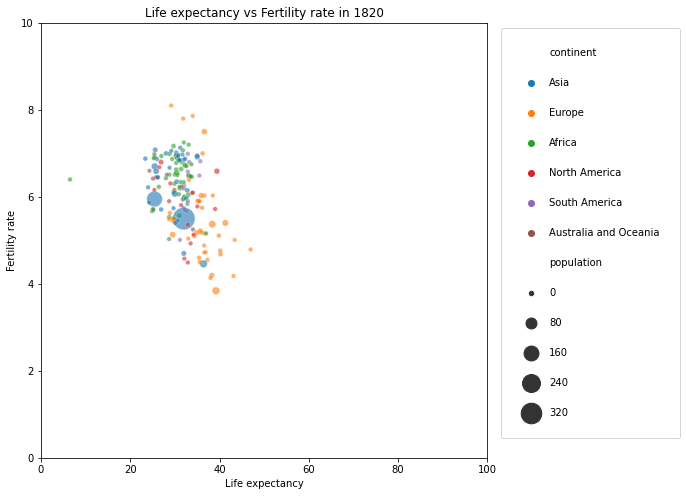

<Figure size 432x288 with 0 Axes>

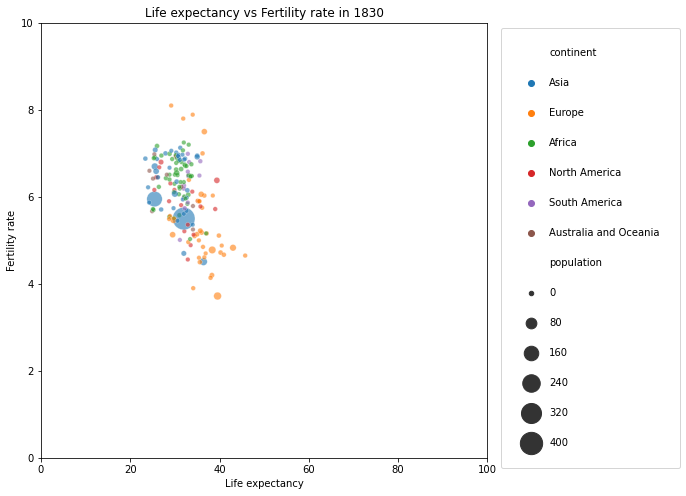

<Figure size 432x288 with 0 Axes>

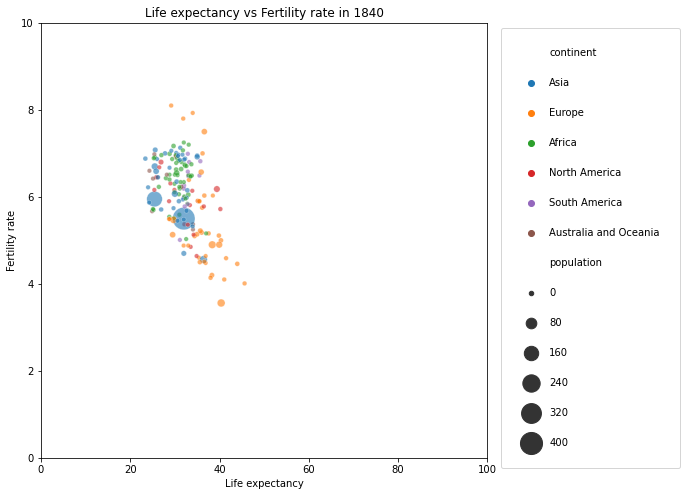

<Figure size 432x288 with 0 Axes>

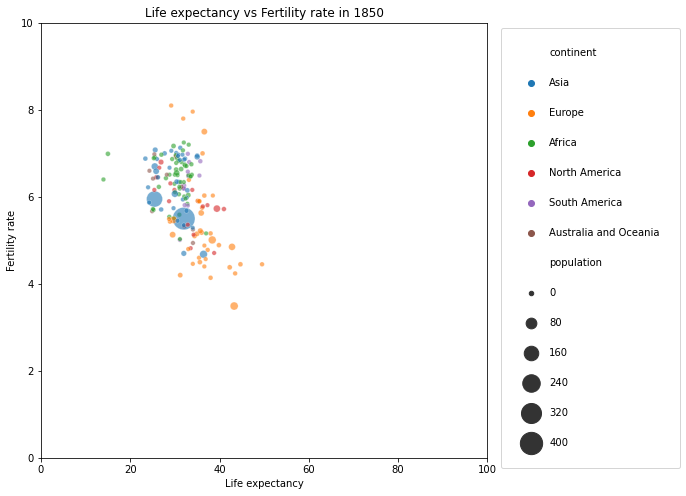

<Figure size 432x288 with 0 Axes>

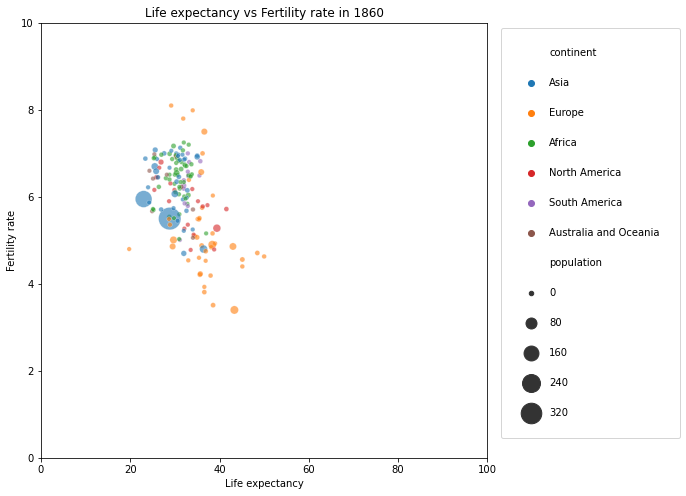

<Figure size 432x288 with 0 Axes>

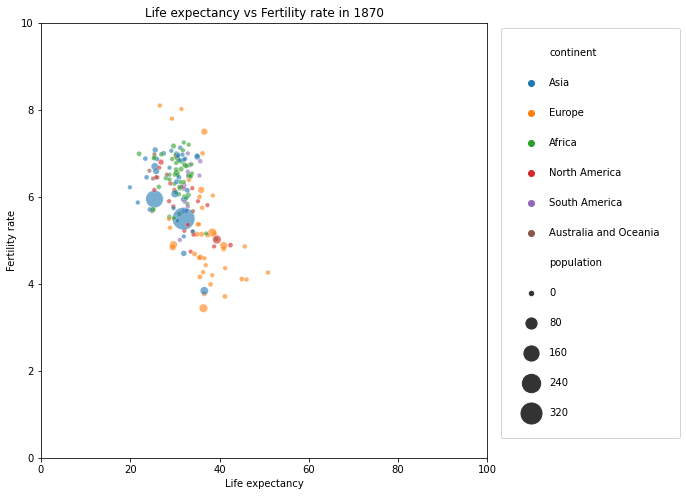

<Figure size 432x288 with 0 Axes>

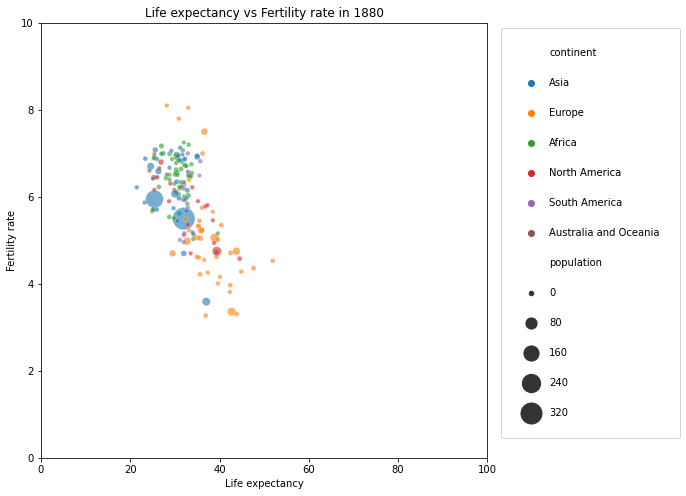

<Figure size 432x288 with 0 Axes>

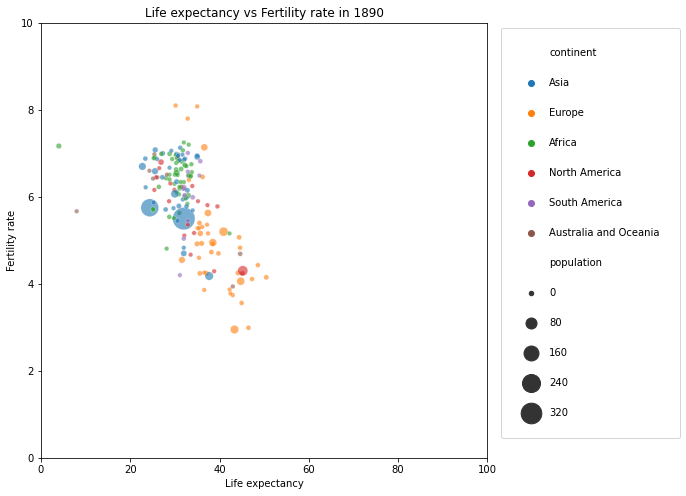

<Figure size 432x288 with 0 Axes>

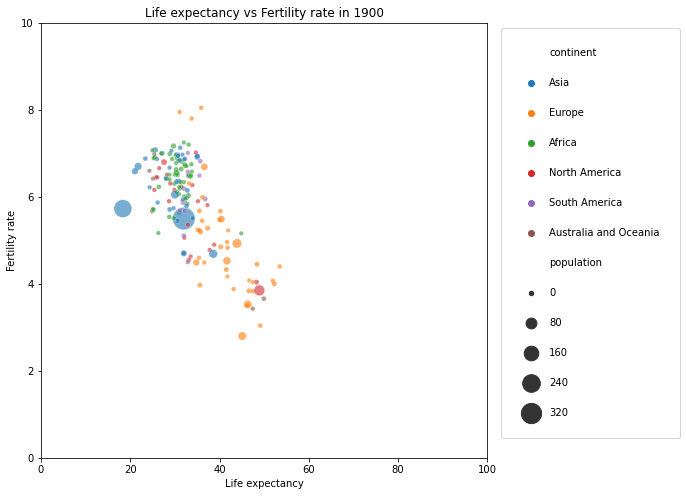

<Figure size 432x288 with 0 Axes>

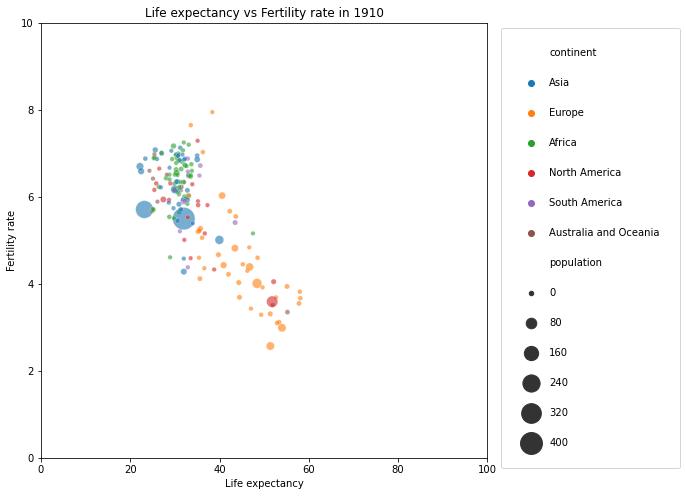

<Figure size 432x288 with 0 Axes>

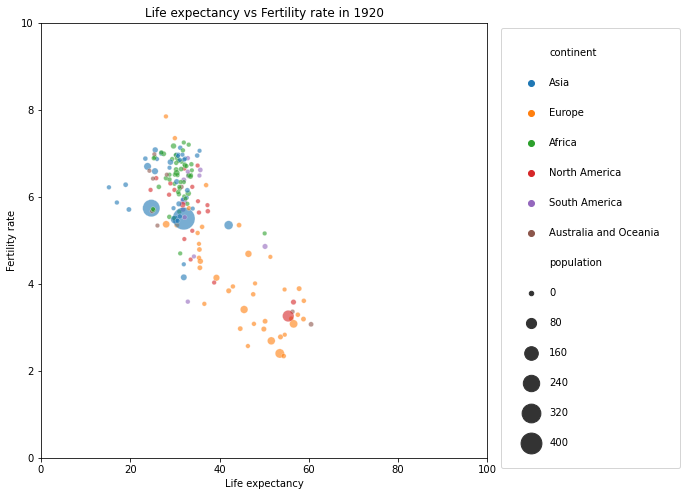

<Figure size 432x288 with 0 Axes>

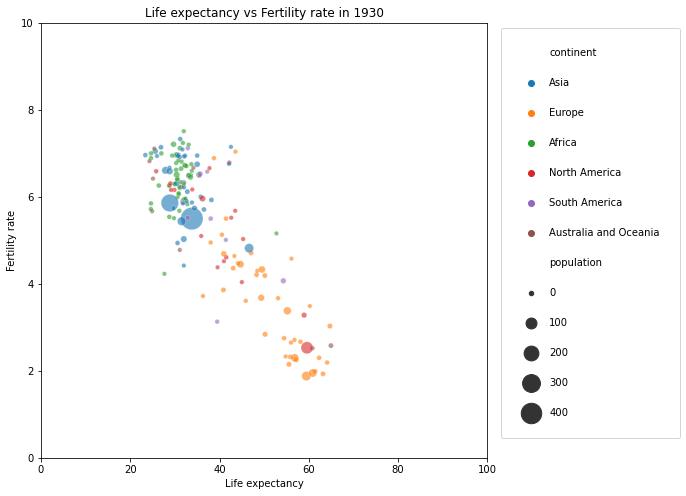

<Figure size 432x288 with 0 Axes>

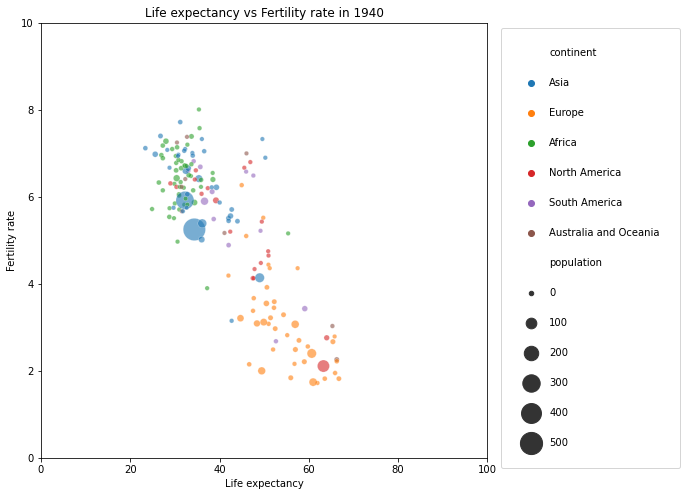

<Figure size 432x288 with 0 Axes>

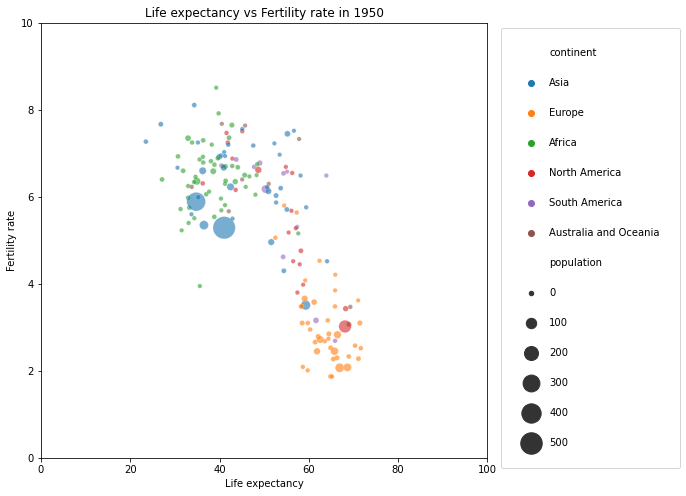

<Figure size 432x288 with 0 Axes>

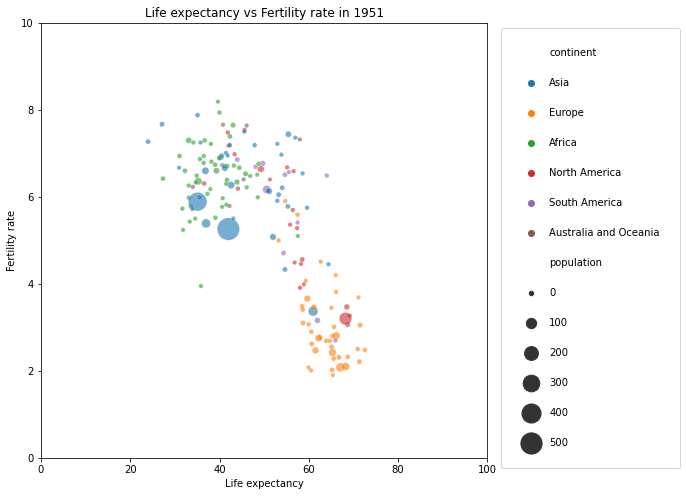

<Figure size 432x288 with 0 Axes>

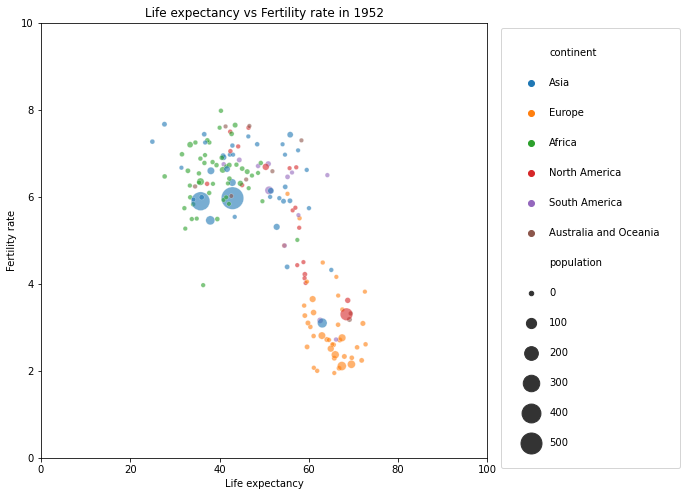

<Figure size 432x288 with 0 Axes>

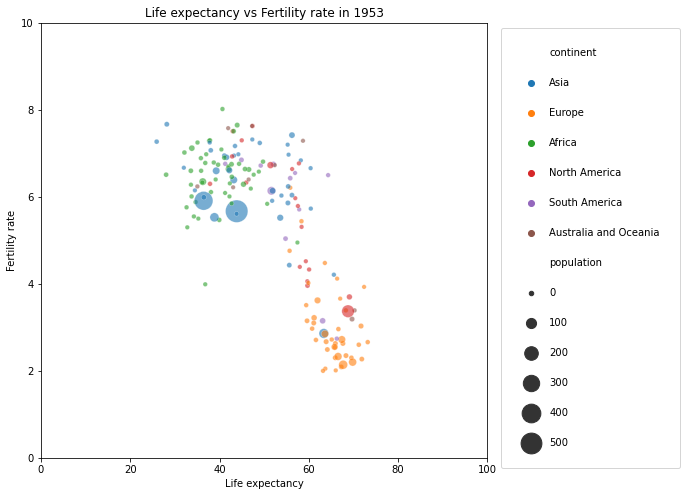

<Figure size 432x288 with 0 Axes>

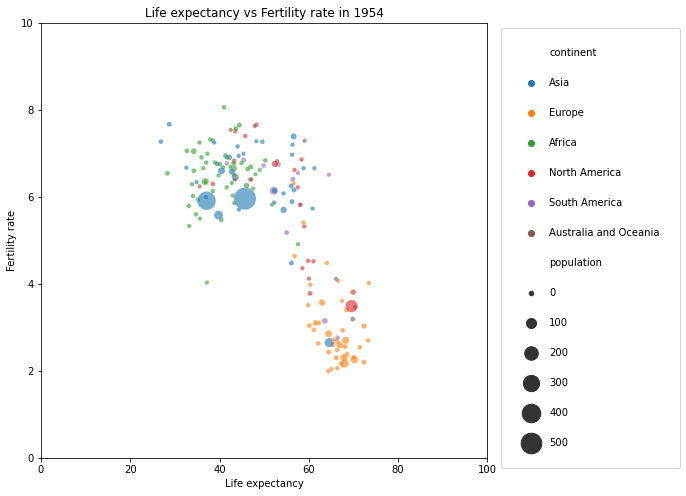

<Figure size 432x288 with 0 Axes>

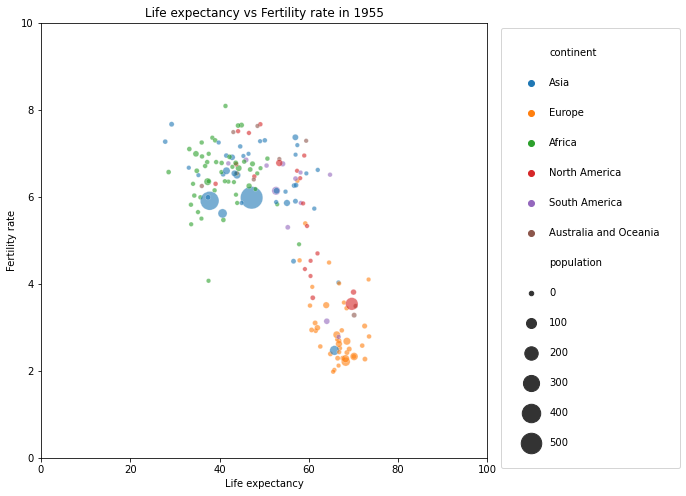

<Figure size 432x288 with 0 Axes>

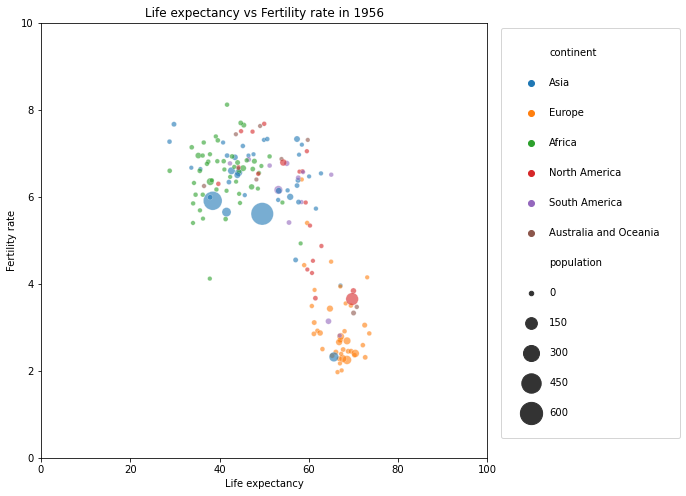

<Figure size 432x288 with 0 Axes>

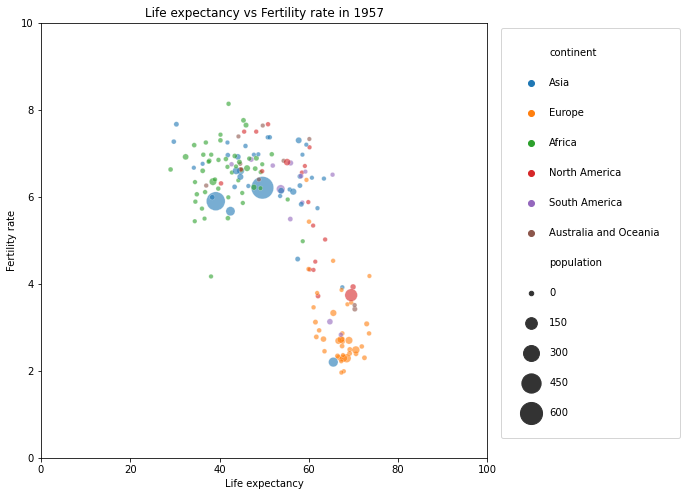

<Figure size 432x288 with 0 Axes>

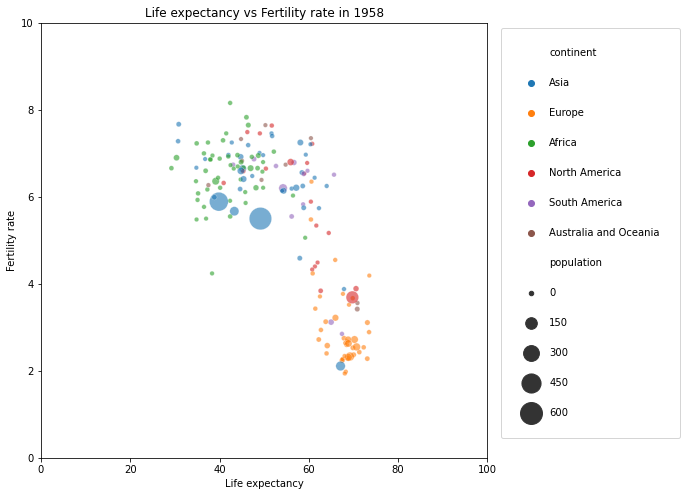

<Figure size 432x288 with 0 Axes>

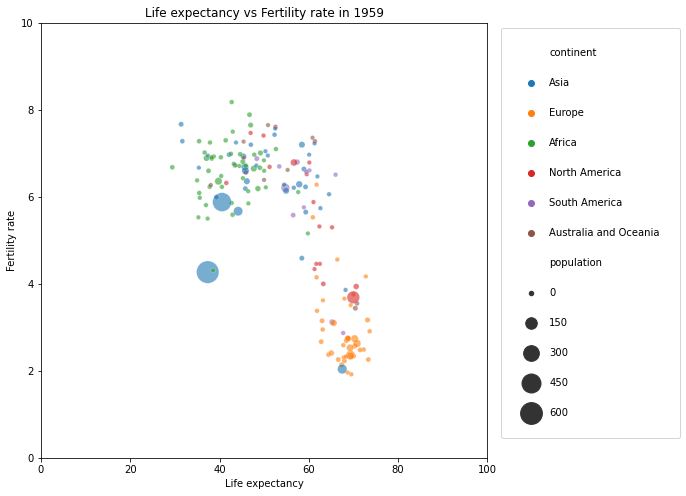

<Figure size 432x288 with 0 Axes>

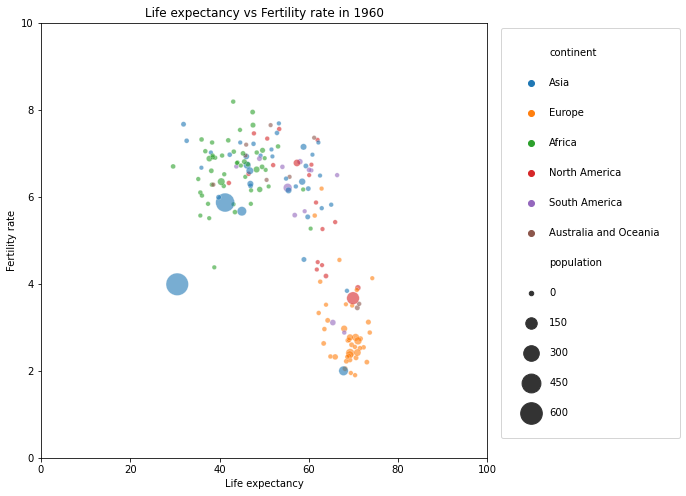

<Figure size 432x288 with 0 Axes>

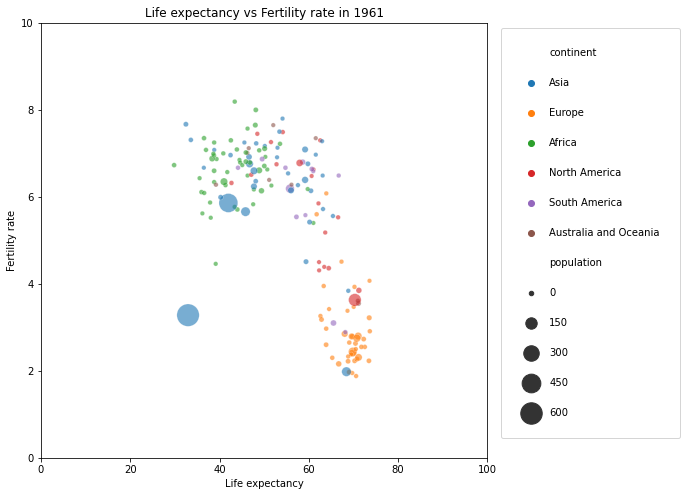

<Figure size 432x288 with 0 Axes>

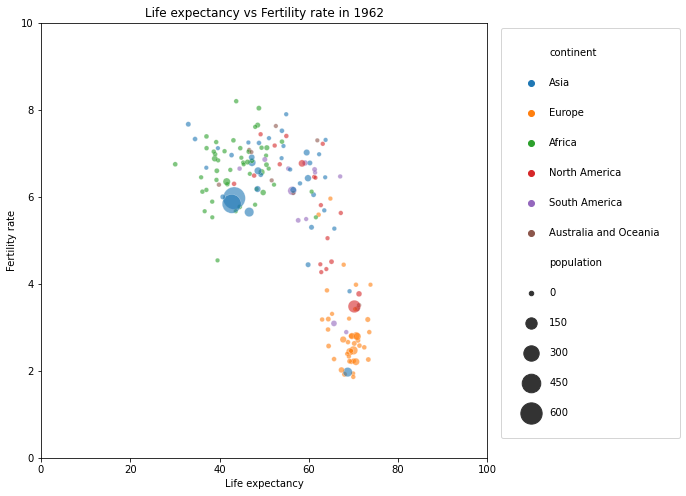

<Figure size 432x288 with 0 Axes>

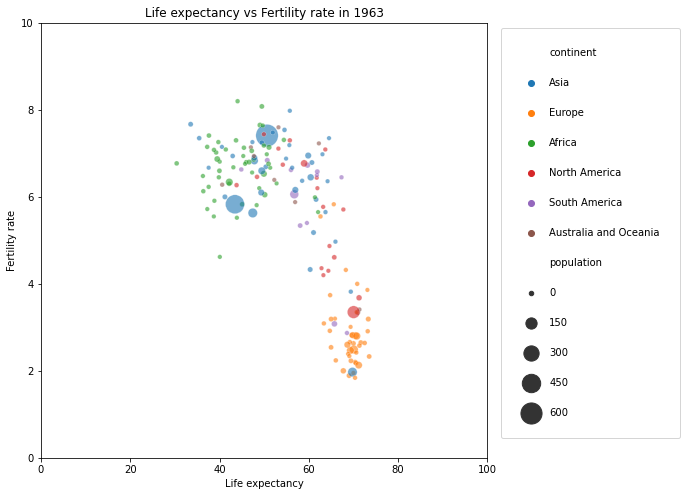

<Figure size 432x288 with 0 Axes>

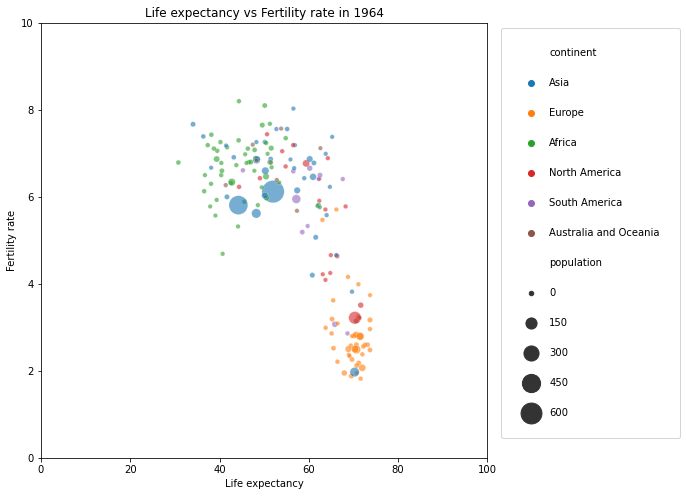

<Figure size 432x288 with 0 Axes>

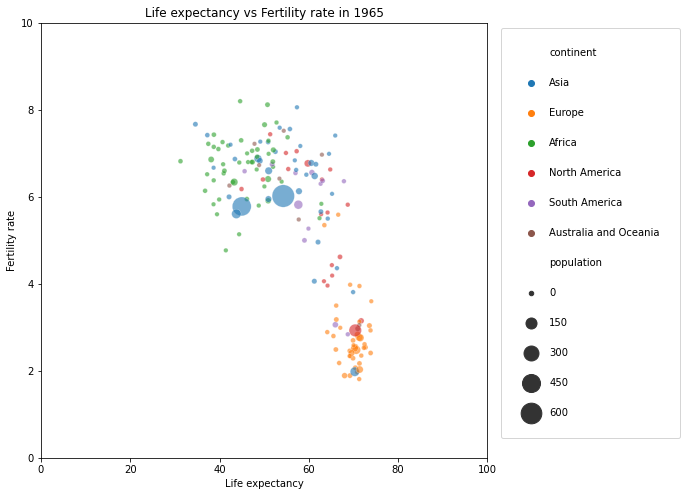

<Figure size 432x288 with 0 Axes>

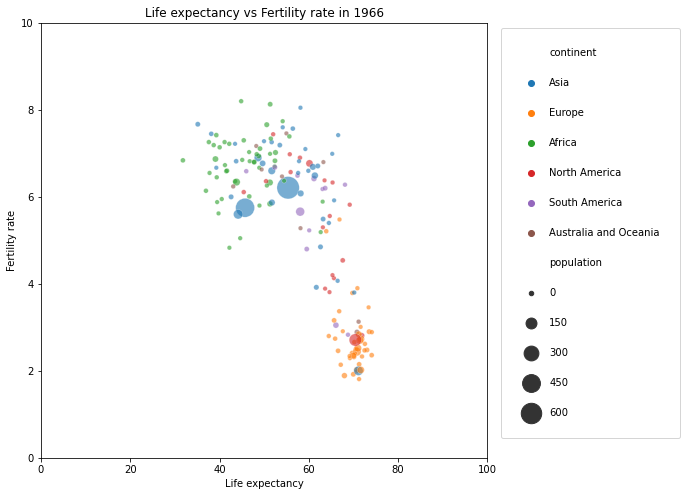

<Figure size 432x288 with 0 Axes>

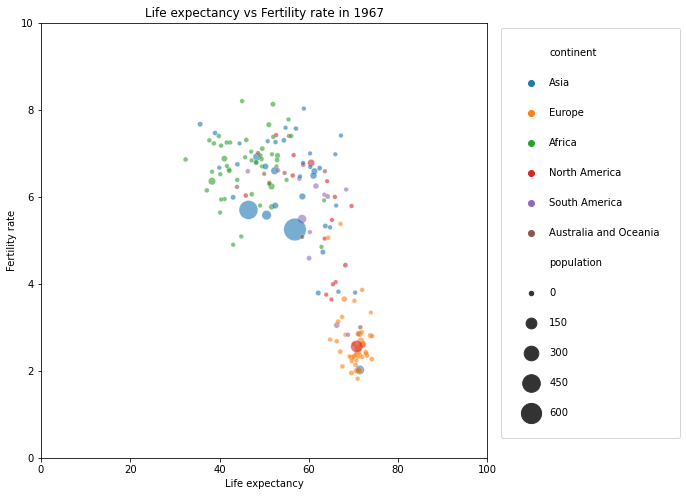

<Figure size 432x288 with 0 Axes>

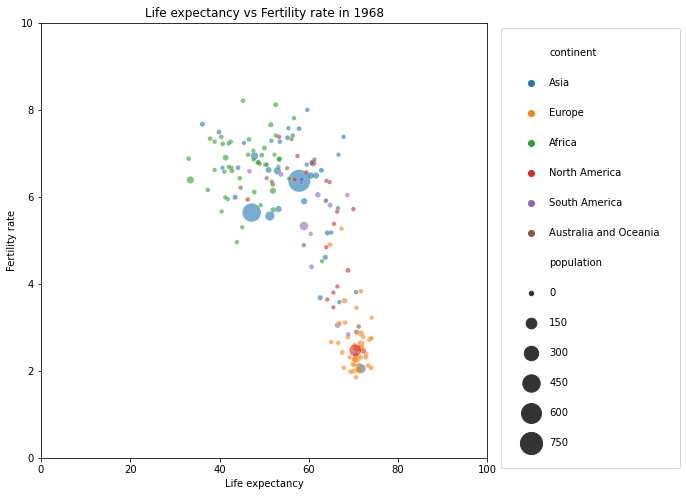

<Figure size 432x288 with 0 Axes>

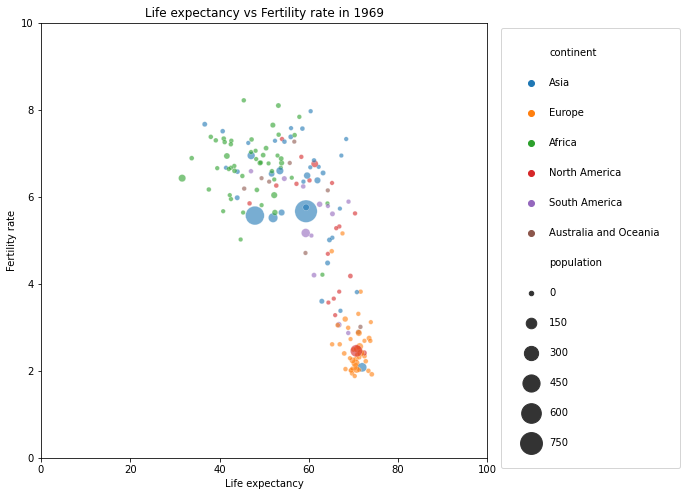

<Figure size 432x288 with 0 Axes>

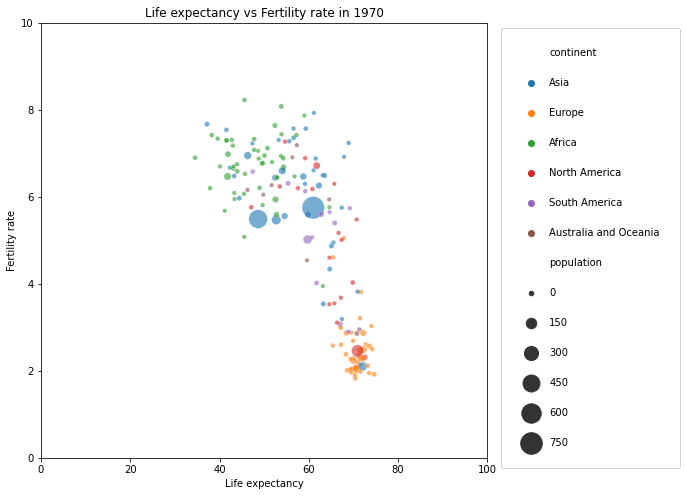

<Figure size 432x288 with 0 Axes>

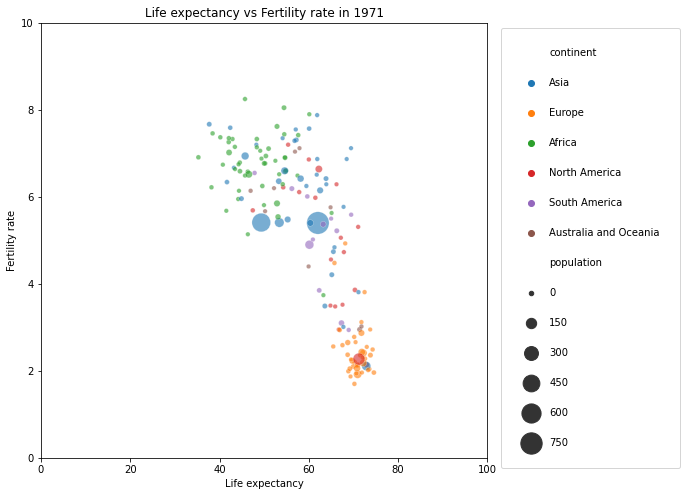

<Figure size 432x288 with 0 Axes>

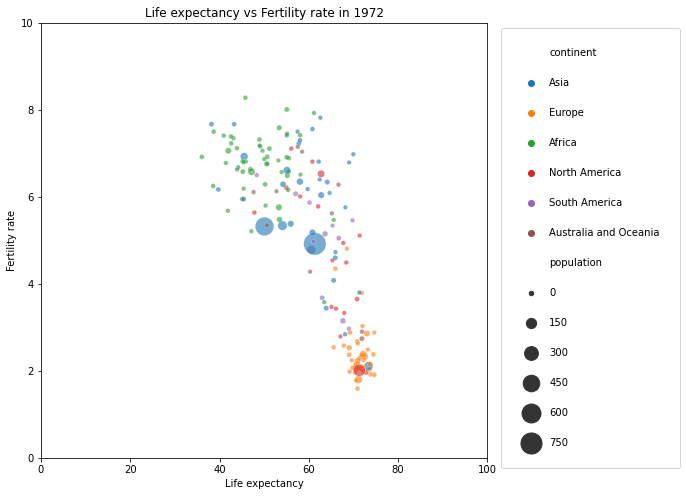

<Figure size 432x288 with 0 Axes>

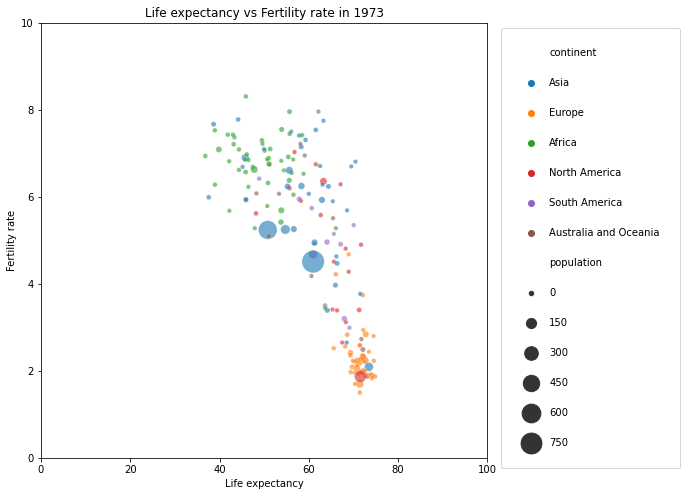

<Figure size 432x288 with 0 Axes>

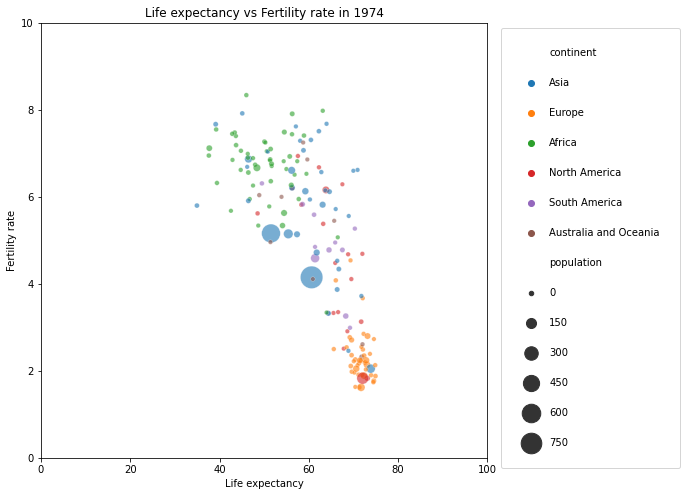

<Figure size 432x288 with 0 Axes>

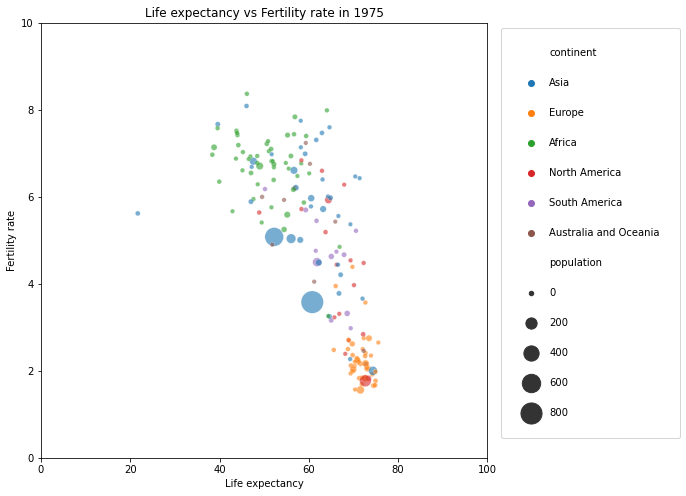

<Figure size 432x288 with 0 Axes>

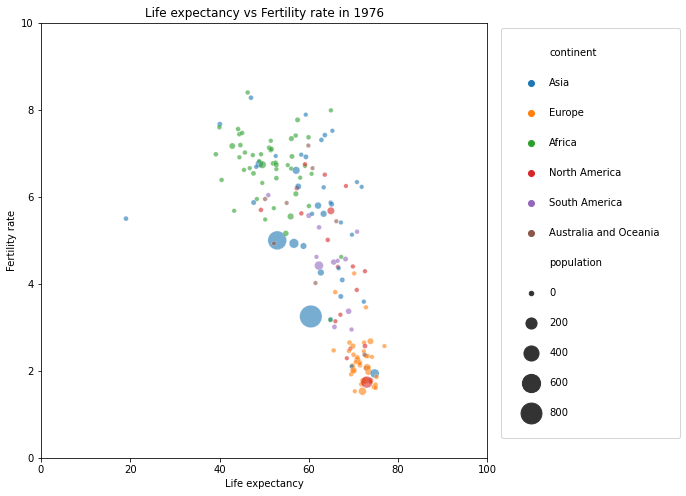

<Figure size 432x288 with 0 Axes>

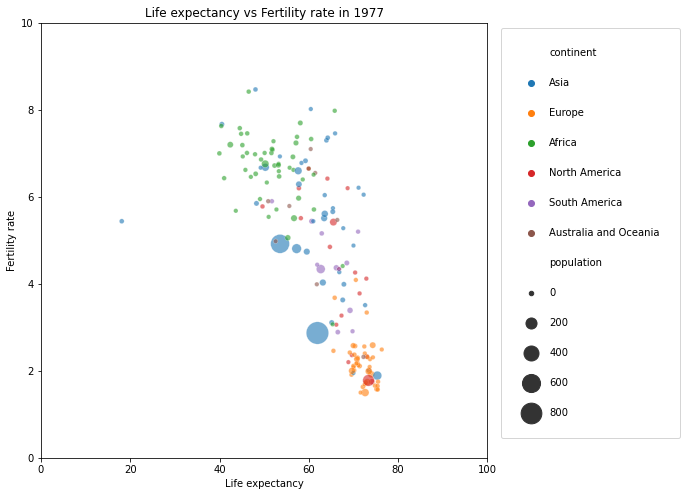

<Figure size 432x288 with 0 Axes>

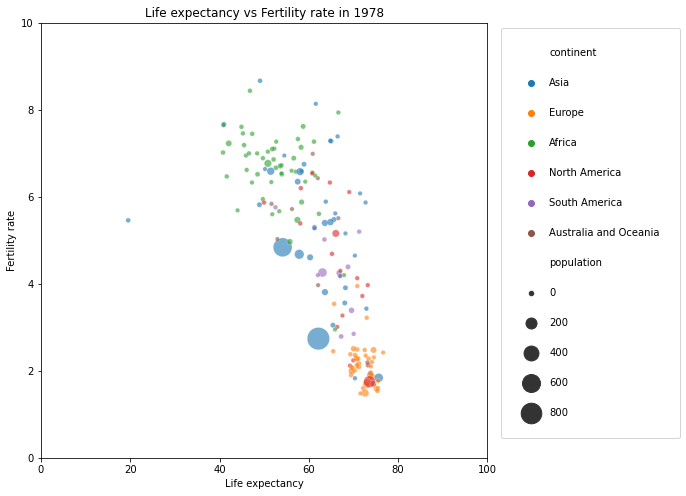

<Figure size 432x288 with 0 Axes>

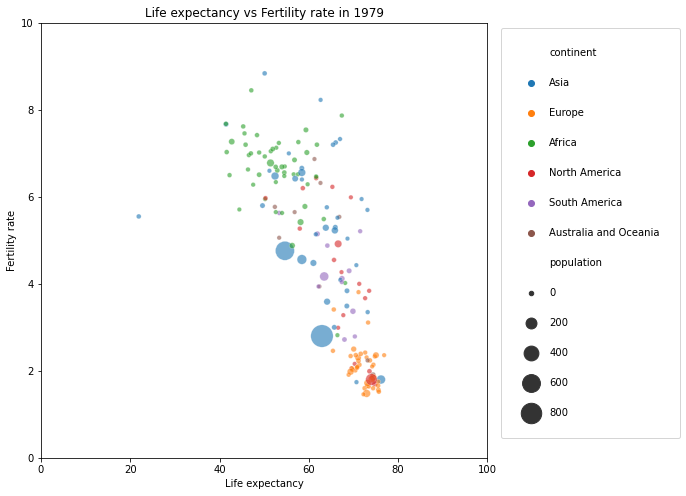

<Figure size 432x288 with 0 Axes>

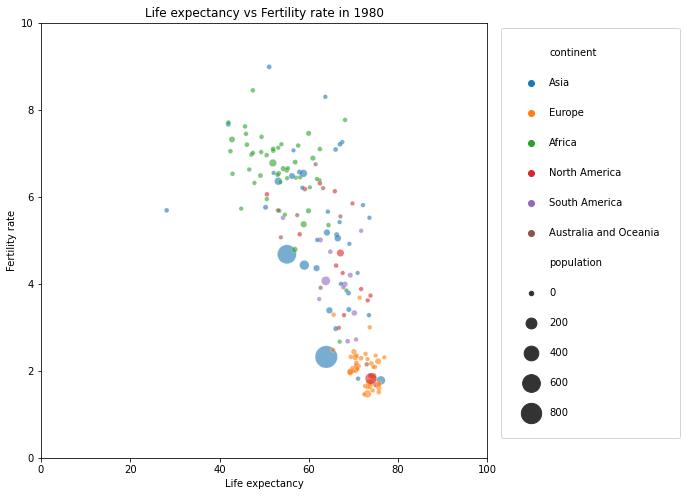

<Figure size 432x288 with 0 Axes>

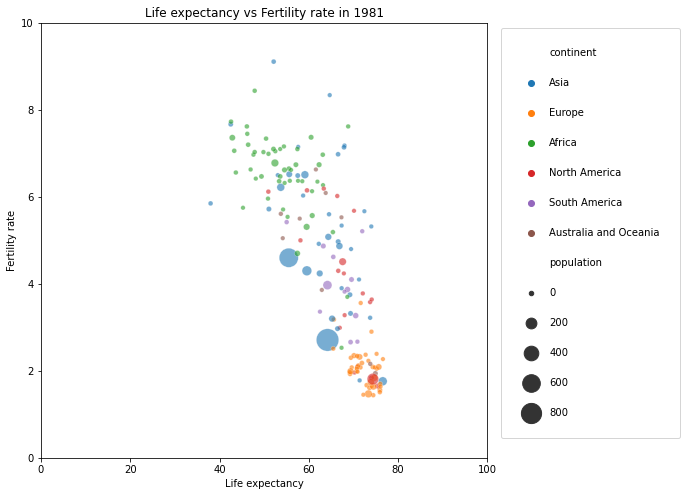

<Figure size 432x288 with 0 Axes>

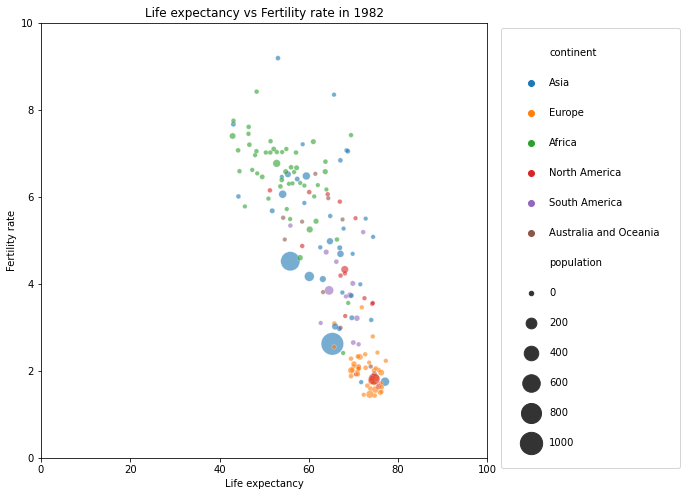

<Figure size 432x288 with 0 Axes>

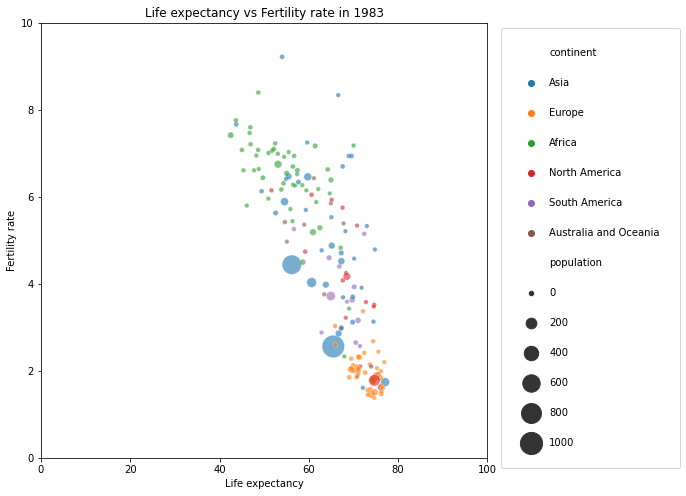

<Figure size 432x288 with 0 Axes>

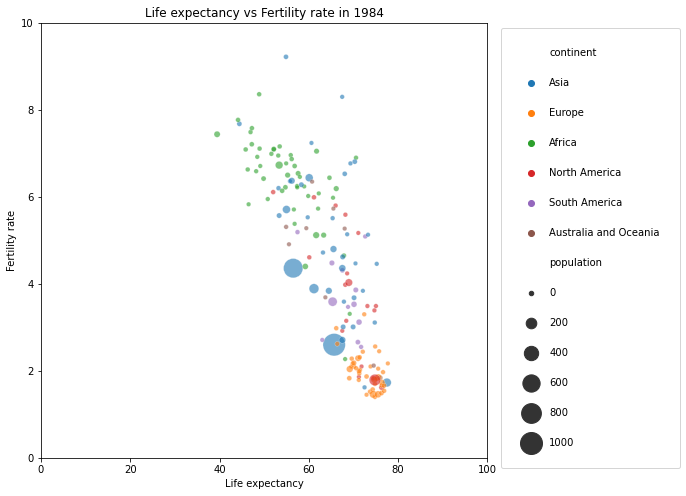

<Figure size 432x288 with 0 Axes>

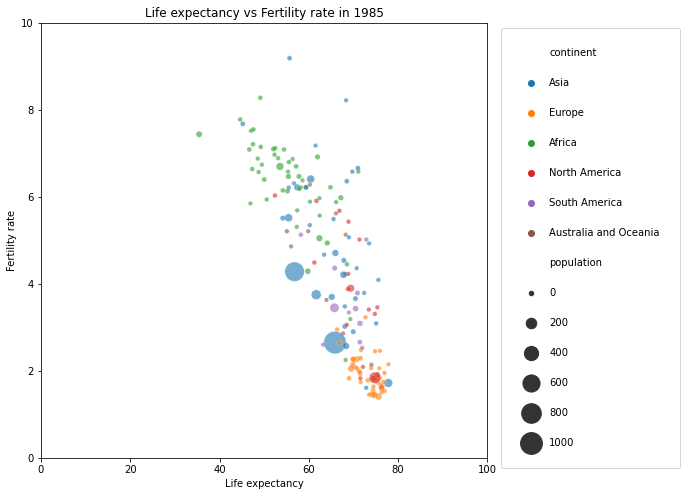

<Figure size 432x288 with 0 Axes>

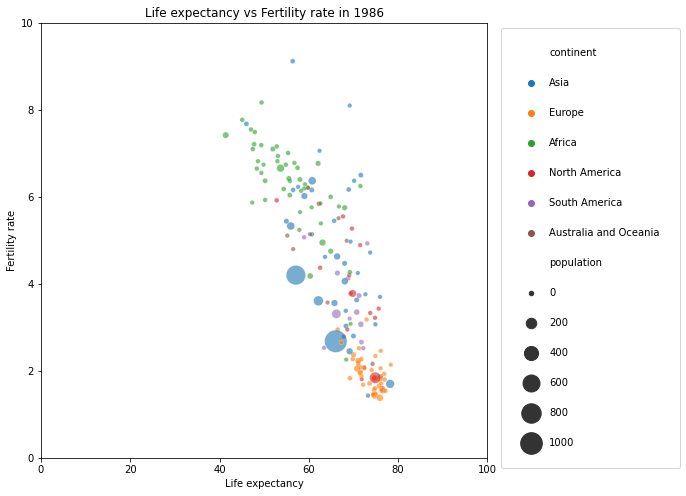

<Figure size 432x288 with 0 Axes>

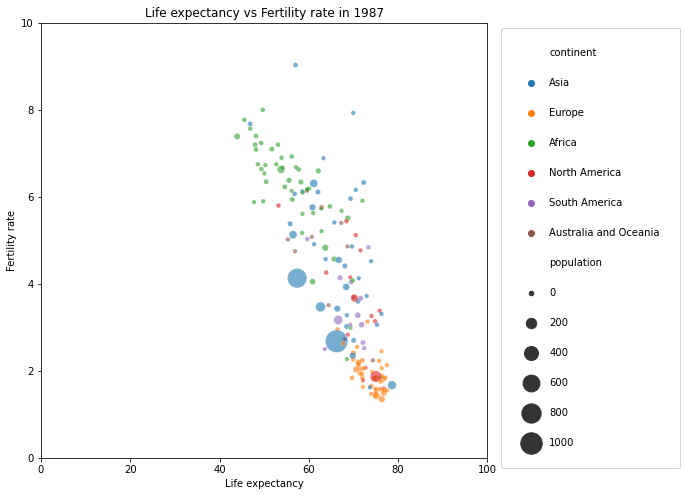

<Figure size 432x288 with 0 Axes>

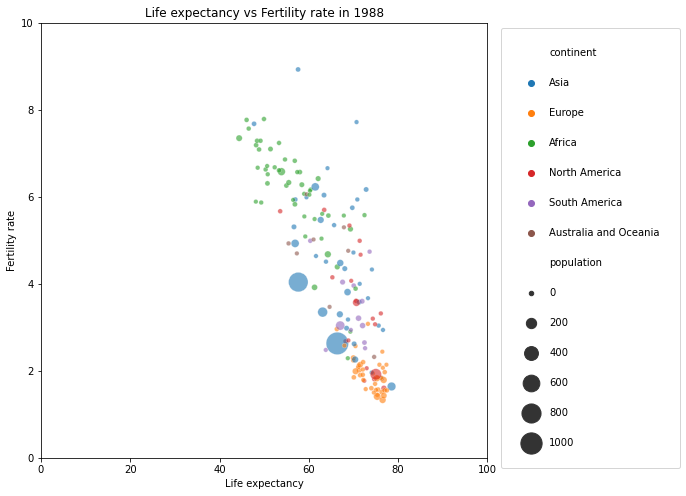

<Figure size 432x288 with 0 Axes>

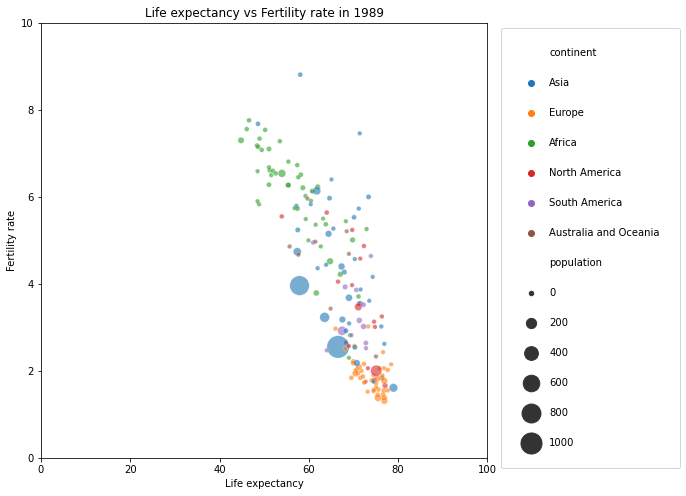

<Figure size 432x288 with 0 Axes>

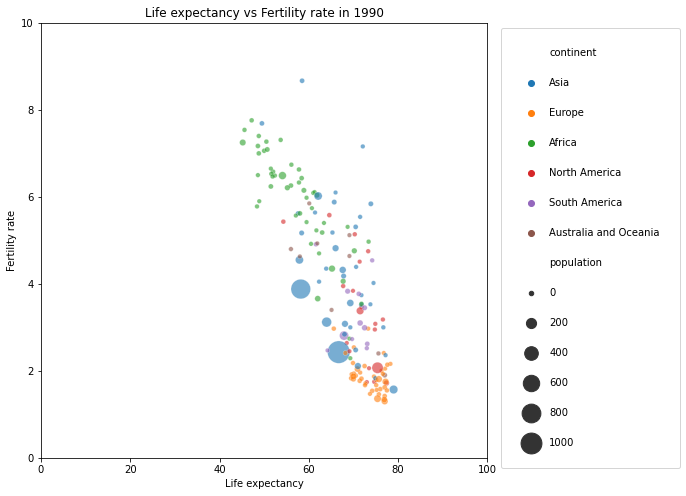

<Figure size 432x288 with 0 Axes>

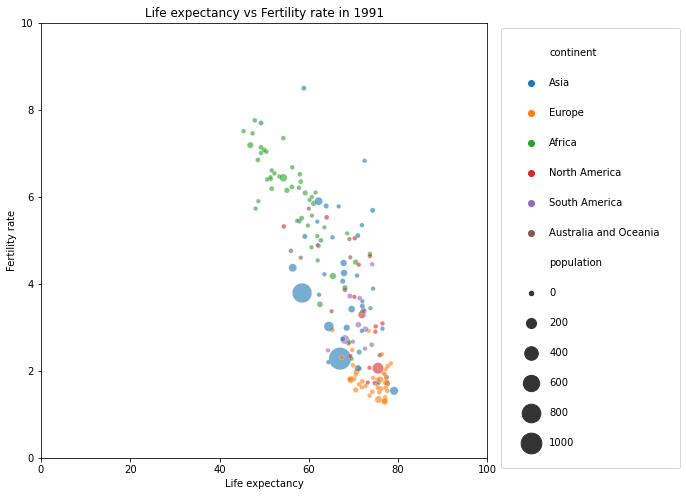

<Figure size 432x288 with 0 Axes>

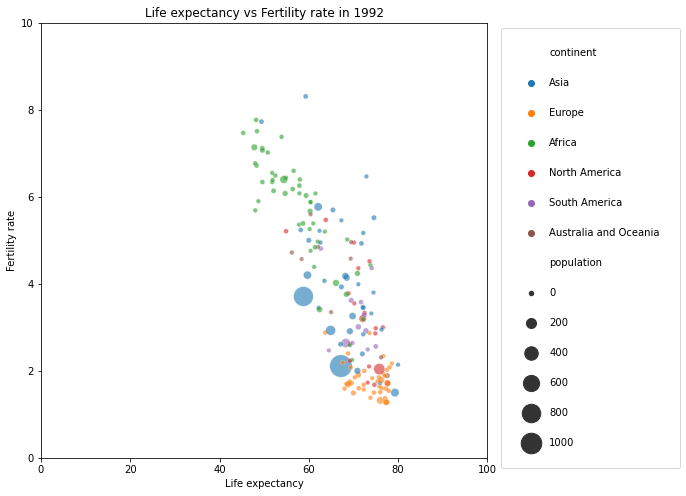

<Figure size 432x288 with 0 Axes>

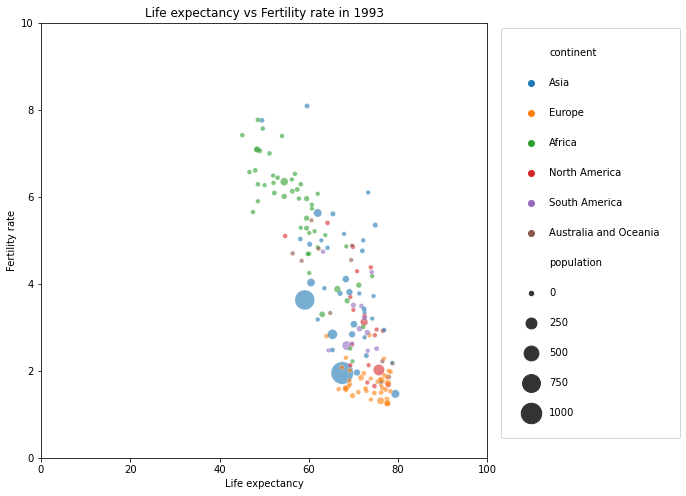

<Figure size 432x288 with 0 Axes>

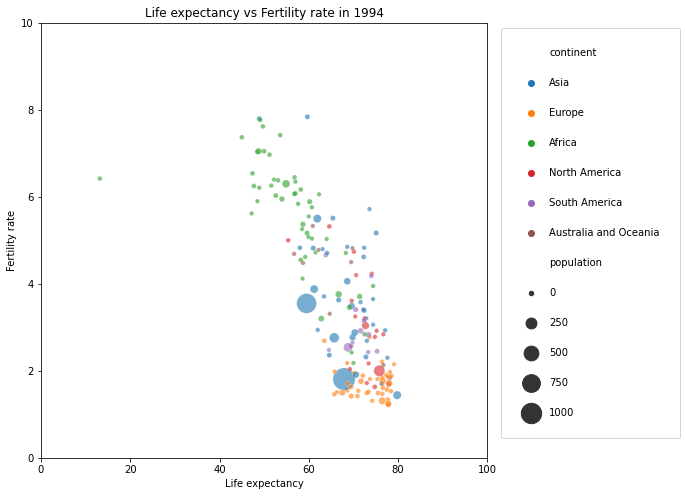

<Figure size 432x288 with 0 Axes>

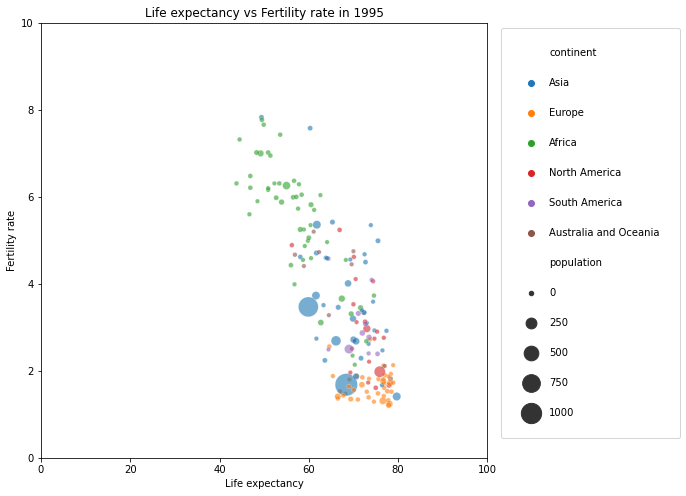

<Figure size 432x288 with 0 Axes>

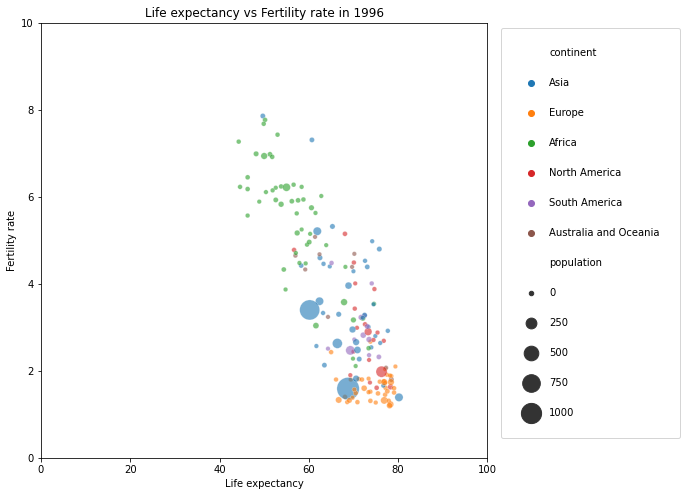

<Figure size 432x288 with 0 Axes>

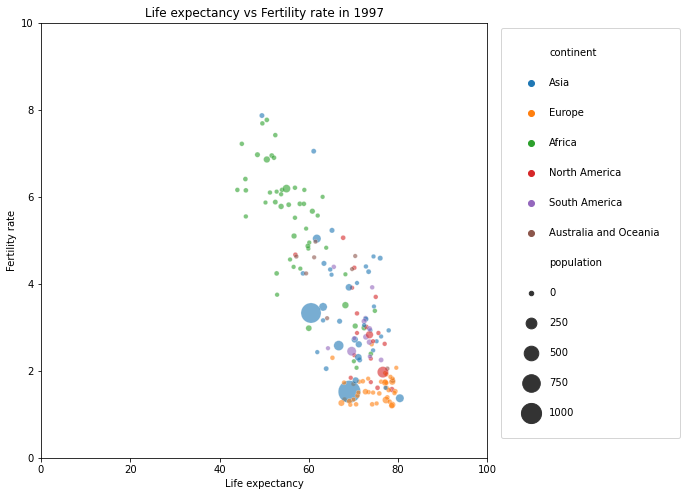

<Figure size 432x288 with 0 Axes>

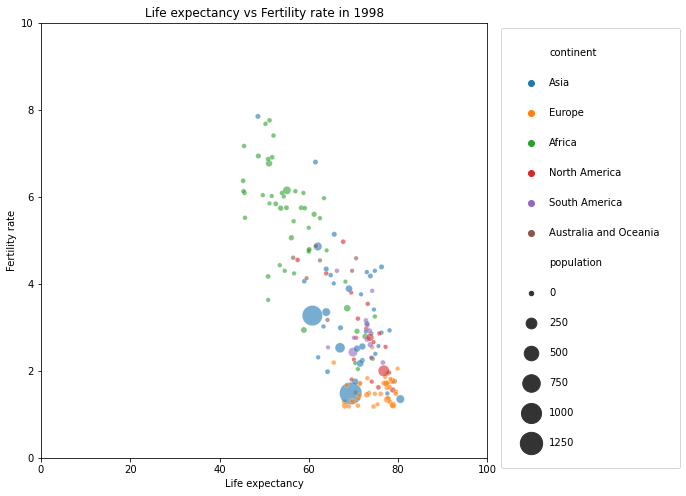

<Figure size 432x288 with 0 Axes>

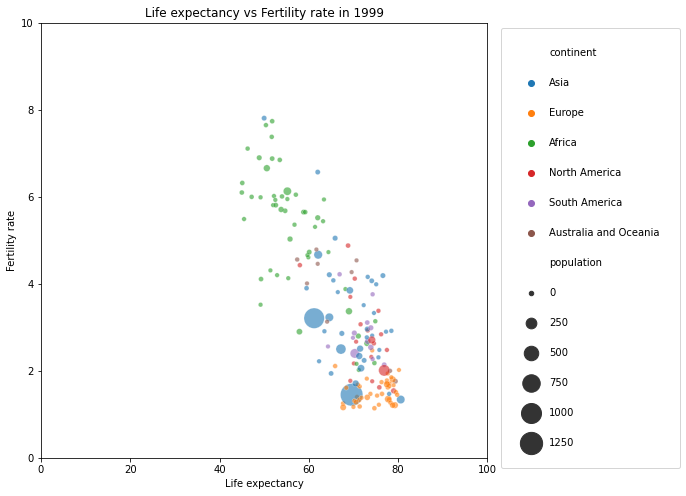

<Figure size 432x288 with 0 Axes>

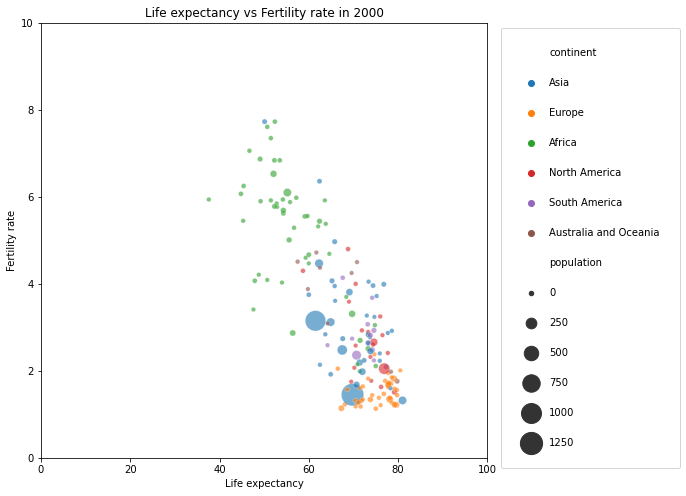

<Figure size 432x288 with 0 Axes>

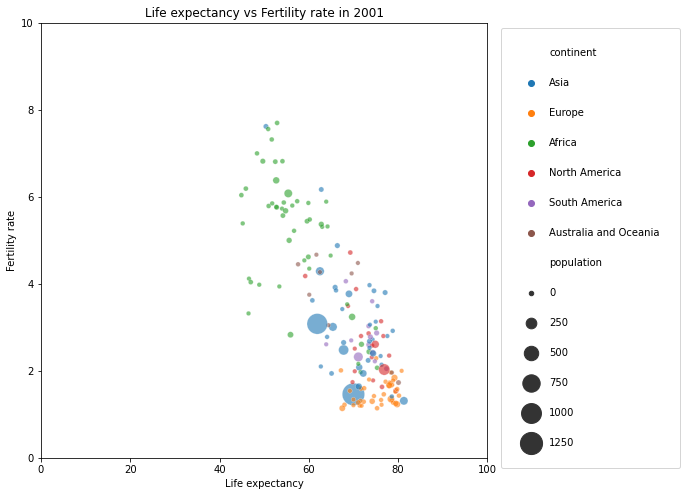

<Figure size 432x288 with 0 Axes>

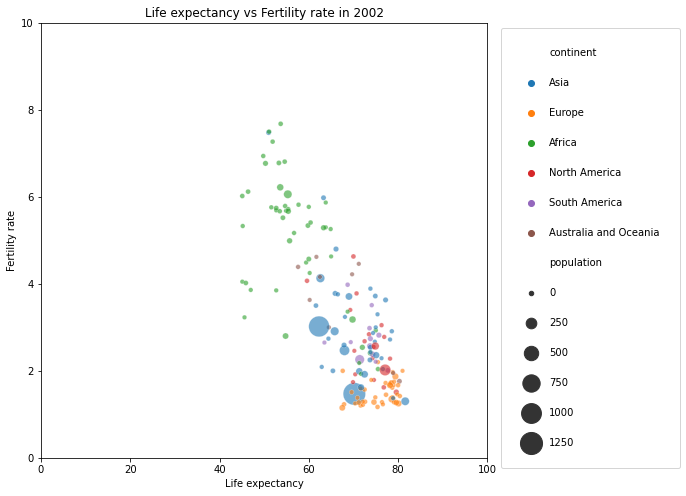

<Figure size 432x288 with 0 Axes>

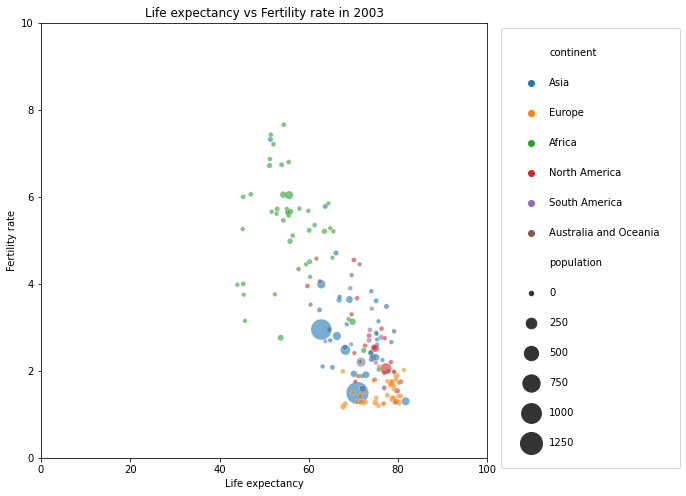

<Figure size 432x288 with 0 Axes>

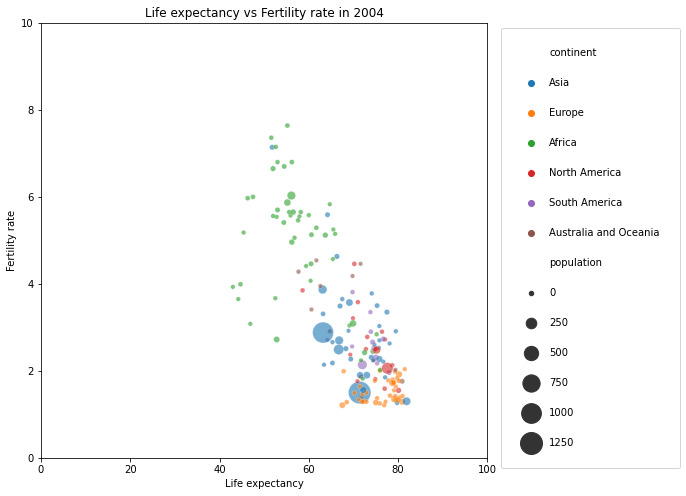

<Figure size 432x288 with 0 Axes>

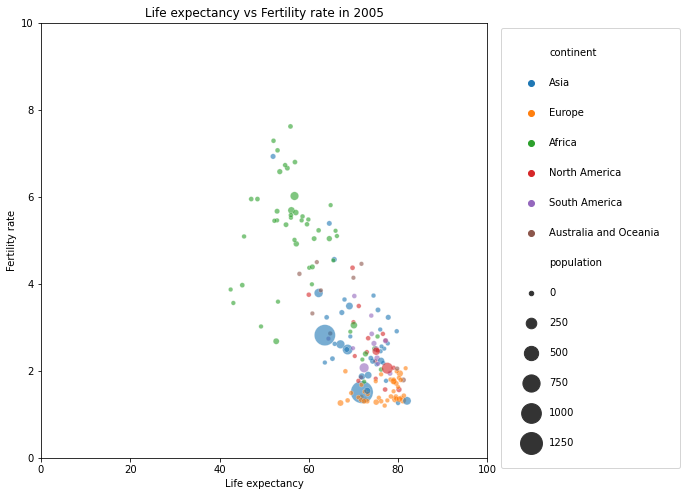

<Figure size 432x288 with 0 Axes>

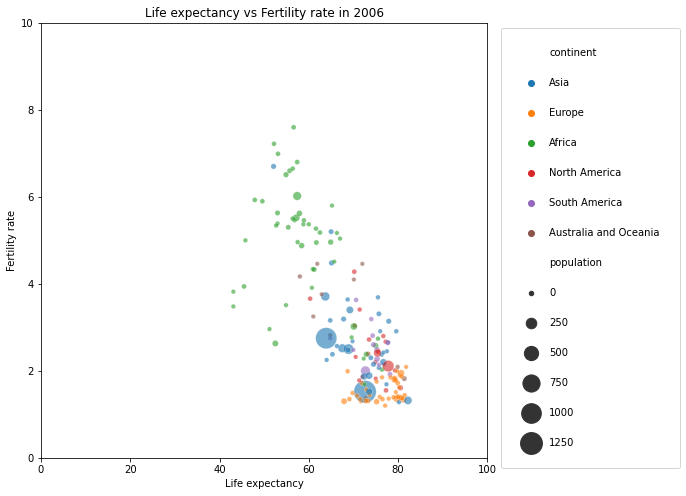

<Figure size 432x288 with 0 Axes>

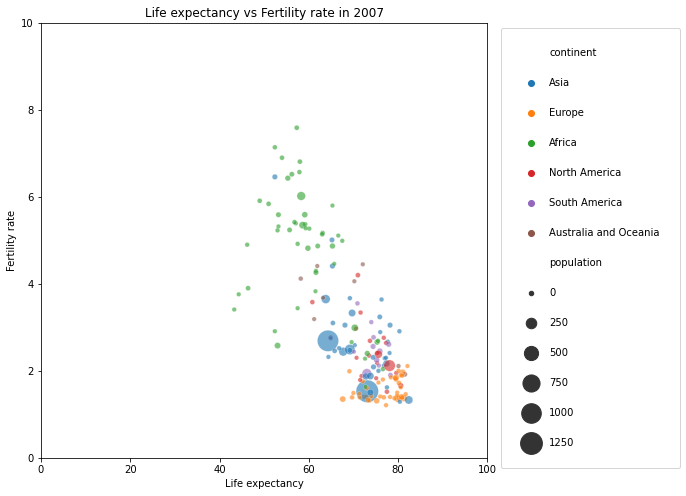

<Figure size 432x288 with 0 Axes>

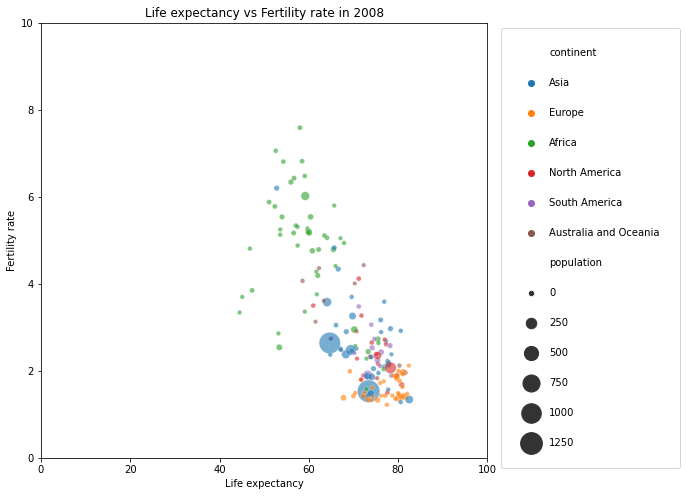

<Figure size 432x288 with 0 Axes>

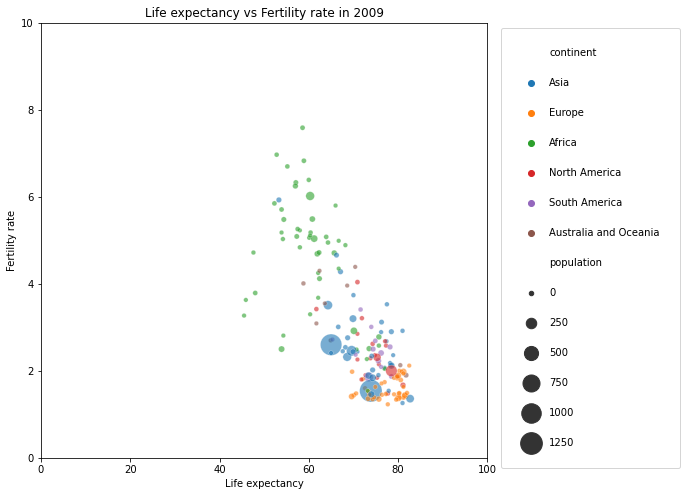

<Figure size 432x288 with 0 Axes>

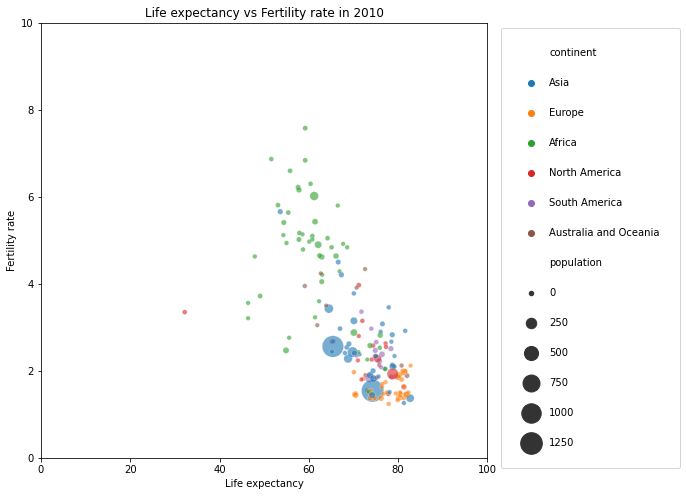

<Figure size 432x288 with 0 Axes>

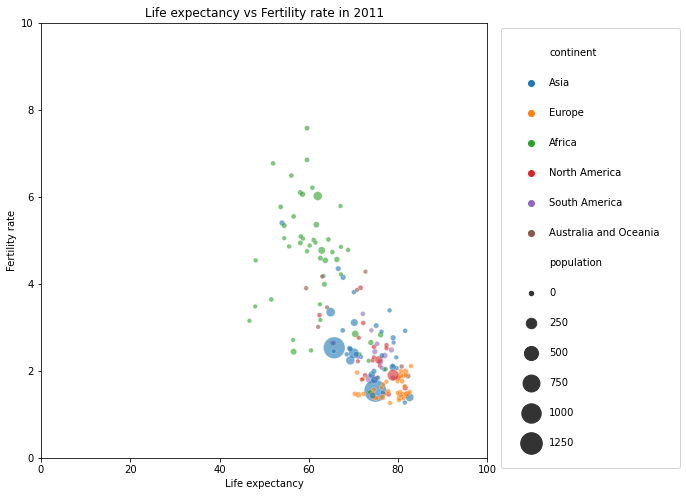

<Figure size 432x288 with 0 Axes>

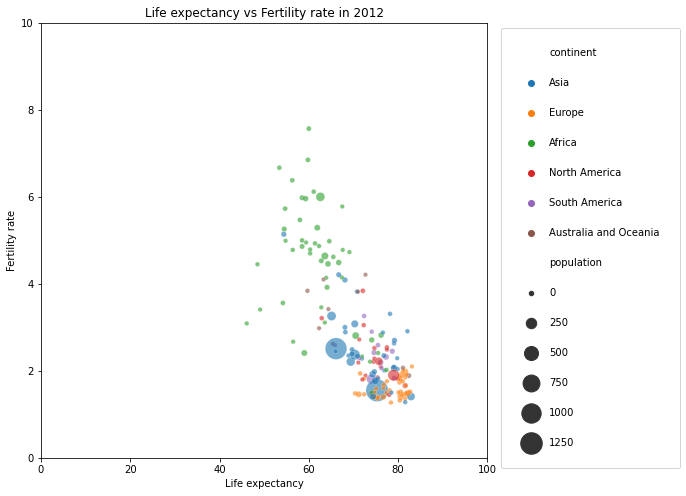

<Figure size 432x288 with 0 Axes>

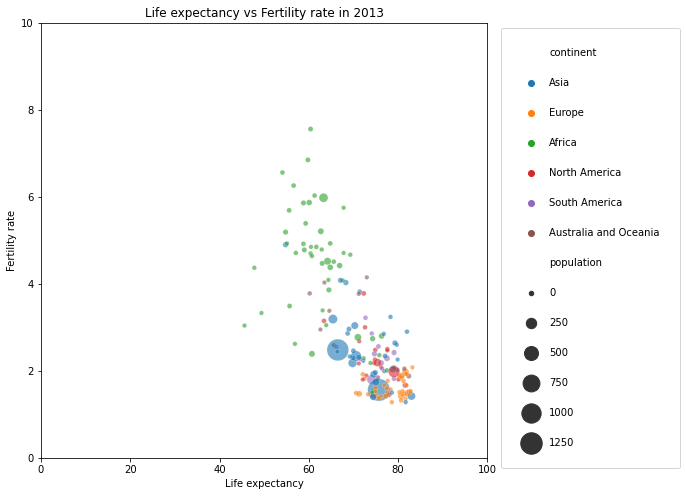

<Figure size 432x288 with 0 Axes>

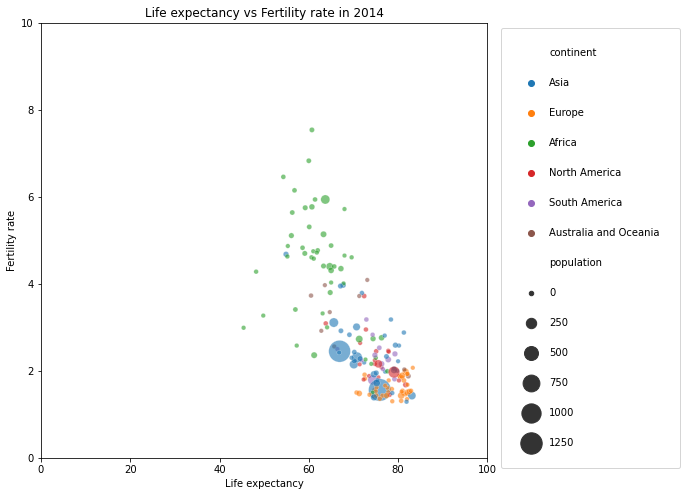

<Figure size 432x288 with 0 Axes>

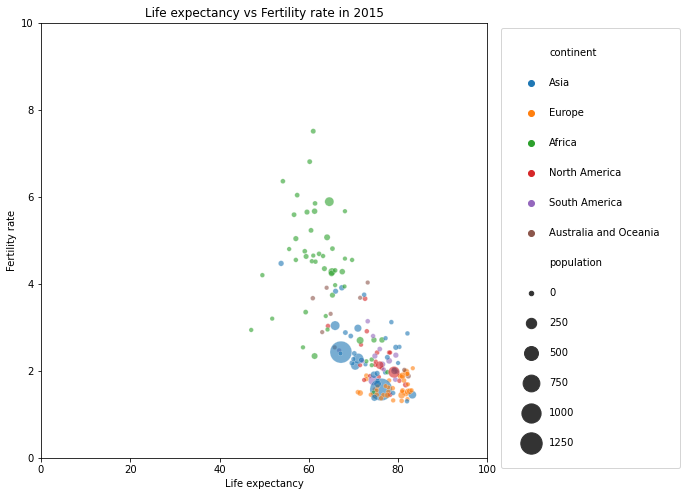

<Figure size 432x288 with 0 Axes>

In [17]:
# step 11 To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

#Write a for loop that goes through each year and produces a scatterplot.

#Save each scatterplot to a separate file containing the year in the filename, e.g. lifeexp_1999.png. After saving the plot call plt.close() to remove the plot from the notebook.

#step 12 Add another dimension to the visualization by utilizing the population data.

#Adjust the plot, so that the size of the symbols represent the population from the gapminder dataset.

filenames = []
def scatter_plots(i):
    df_subset = df.loc[df['year'] == i]
    if df_subset.empty != True:
        plt.figure(figsize=(8, 8))
        scatterplot = sns.scatterplot(x='life_expectancy', y='fertility_rate', data=df_subset, alpha=0.6, hue='continent', size='population', sizes=(20, 500))
        fig = scatterplot.get_figure()
        filenames.append(str(i)+'.jpeg')
        plt.xlabel('Life expectancy')
        plt.ylabel('Fertility rate')
        plt.title("Life expectancy vs Fertility rate in "+f"{i}")
        plt.legend(borderpad = 2, labelspacing = 2, bbox_to_anchor=(1.02, 1), loc=2)
        plt.axis((0, 100, 0, 10))
        plt.savefig(str(i)+'.jpeg', bbox_inches='tight')
        plt.show()
        plt.clf()
        

for year in range(1800, 2016):
    scatter_plots(year)


    
#step 13 Gif animation
    
import imageio

images = []

for filename in filenames:
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=5)    

